### This is only a baseline model...more to work...

In [45]:
import numpy as np 
import pandas as pd 
import pickle

import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew

from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import xgboost
from xgboost import XGBRegressor, plot_importance 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

In [320]:
with open('./data/closed_listings_cleaned.pickle', 'rb') as read_file:
    df = pickle.load(read_file)
df.head()

,property_id,listing_id,status,list_date,list_price,description.sold_price,description.year_built,description.baths_3qtr,description.sold_date,description.baths_full,...,description.beds,location.address.postal_code,location.address.state,location.address.coordinate.lon,location.address.coordinate.lat,location.address.city,location.address.state_code,location.address.line,location.county.fips_code,location.county.name
0,2507173757,2930532060,sold,2021-06-15T15:05:55Z,1549000.0,1760000,1926,NaN,2021-07-16,2.0,...,3.0,90026,California,-118.276835,34.085110,Los Angeles,CA,3380 Descanso Dr,06037,Los Angeles
1,1681184474,2927976112,sold,2021-04-09T21:02:06Z,879000.0,850000,2008,NaN,2021-07-16,1.0,...,1.0,90015,California,-118.263194,34.040804,Los Angeles,CA,1155 S Grand Ave Apt 1807,06037,Los Angeles
2,2913082626,2930168949,sold,2021-06-05T00:02:43Z,849000.0,1016000,1912,NaN,2021-07-16,2.0,...,2.0,90018,California,-118.314134,34.023169,Los Angeles,CA,3563 S Gramercy Pl,06037,Los Angeles
3,1415870805,2931114156,sold,2021-06-29T16:08:40Z,1499000.0,1625000,1900,NaN,2021-07-16,3.0,...,5.0,90026,California,-118.267025,34.079045,Los Angeles,CA,1107 Waterloo St,06037,Los Angeles
4,2820635269,2929515091,sold,2021-05-20T16:00:15Z,395000.0,385000,1985,NaN,2021-07-16,1.0,...,2.0,90044,California,-118.295523,33.930572,Los Angeles,CA,11401 Berendo Ave Apt 6,06037,Los Angeles


In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72662 entries, 0 to 243197
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   property_id                      72662 non-null  object 
 1   listing_id                       72662 non-null  object 
 2   status                           72662 non-null  object 
 3   list_date                        72661 non-null  object 
 4   list_price                       72662 non-null  float64
 5   description.sold_price           72662 non-null  int64  
 6   description.year_built           72662 non-null  int64  
 7   description.baths_3qtr           3825 non-null   float64
 8   description.sold_date            72662 non-null  object 
 9   description.baths_full           71011 non-null  float64
 10  description.baths_half           19044 non-null  float64
 11  description.lot_sqft             66486 non-null  float64
 12  description.sqft 

In [12]:
#randomly sample 20% data and create a pairplot
sample_df = df.sample(n = 1000, replace = False)



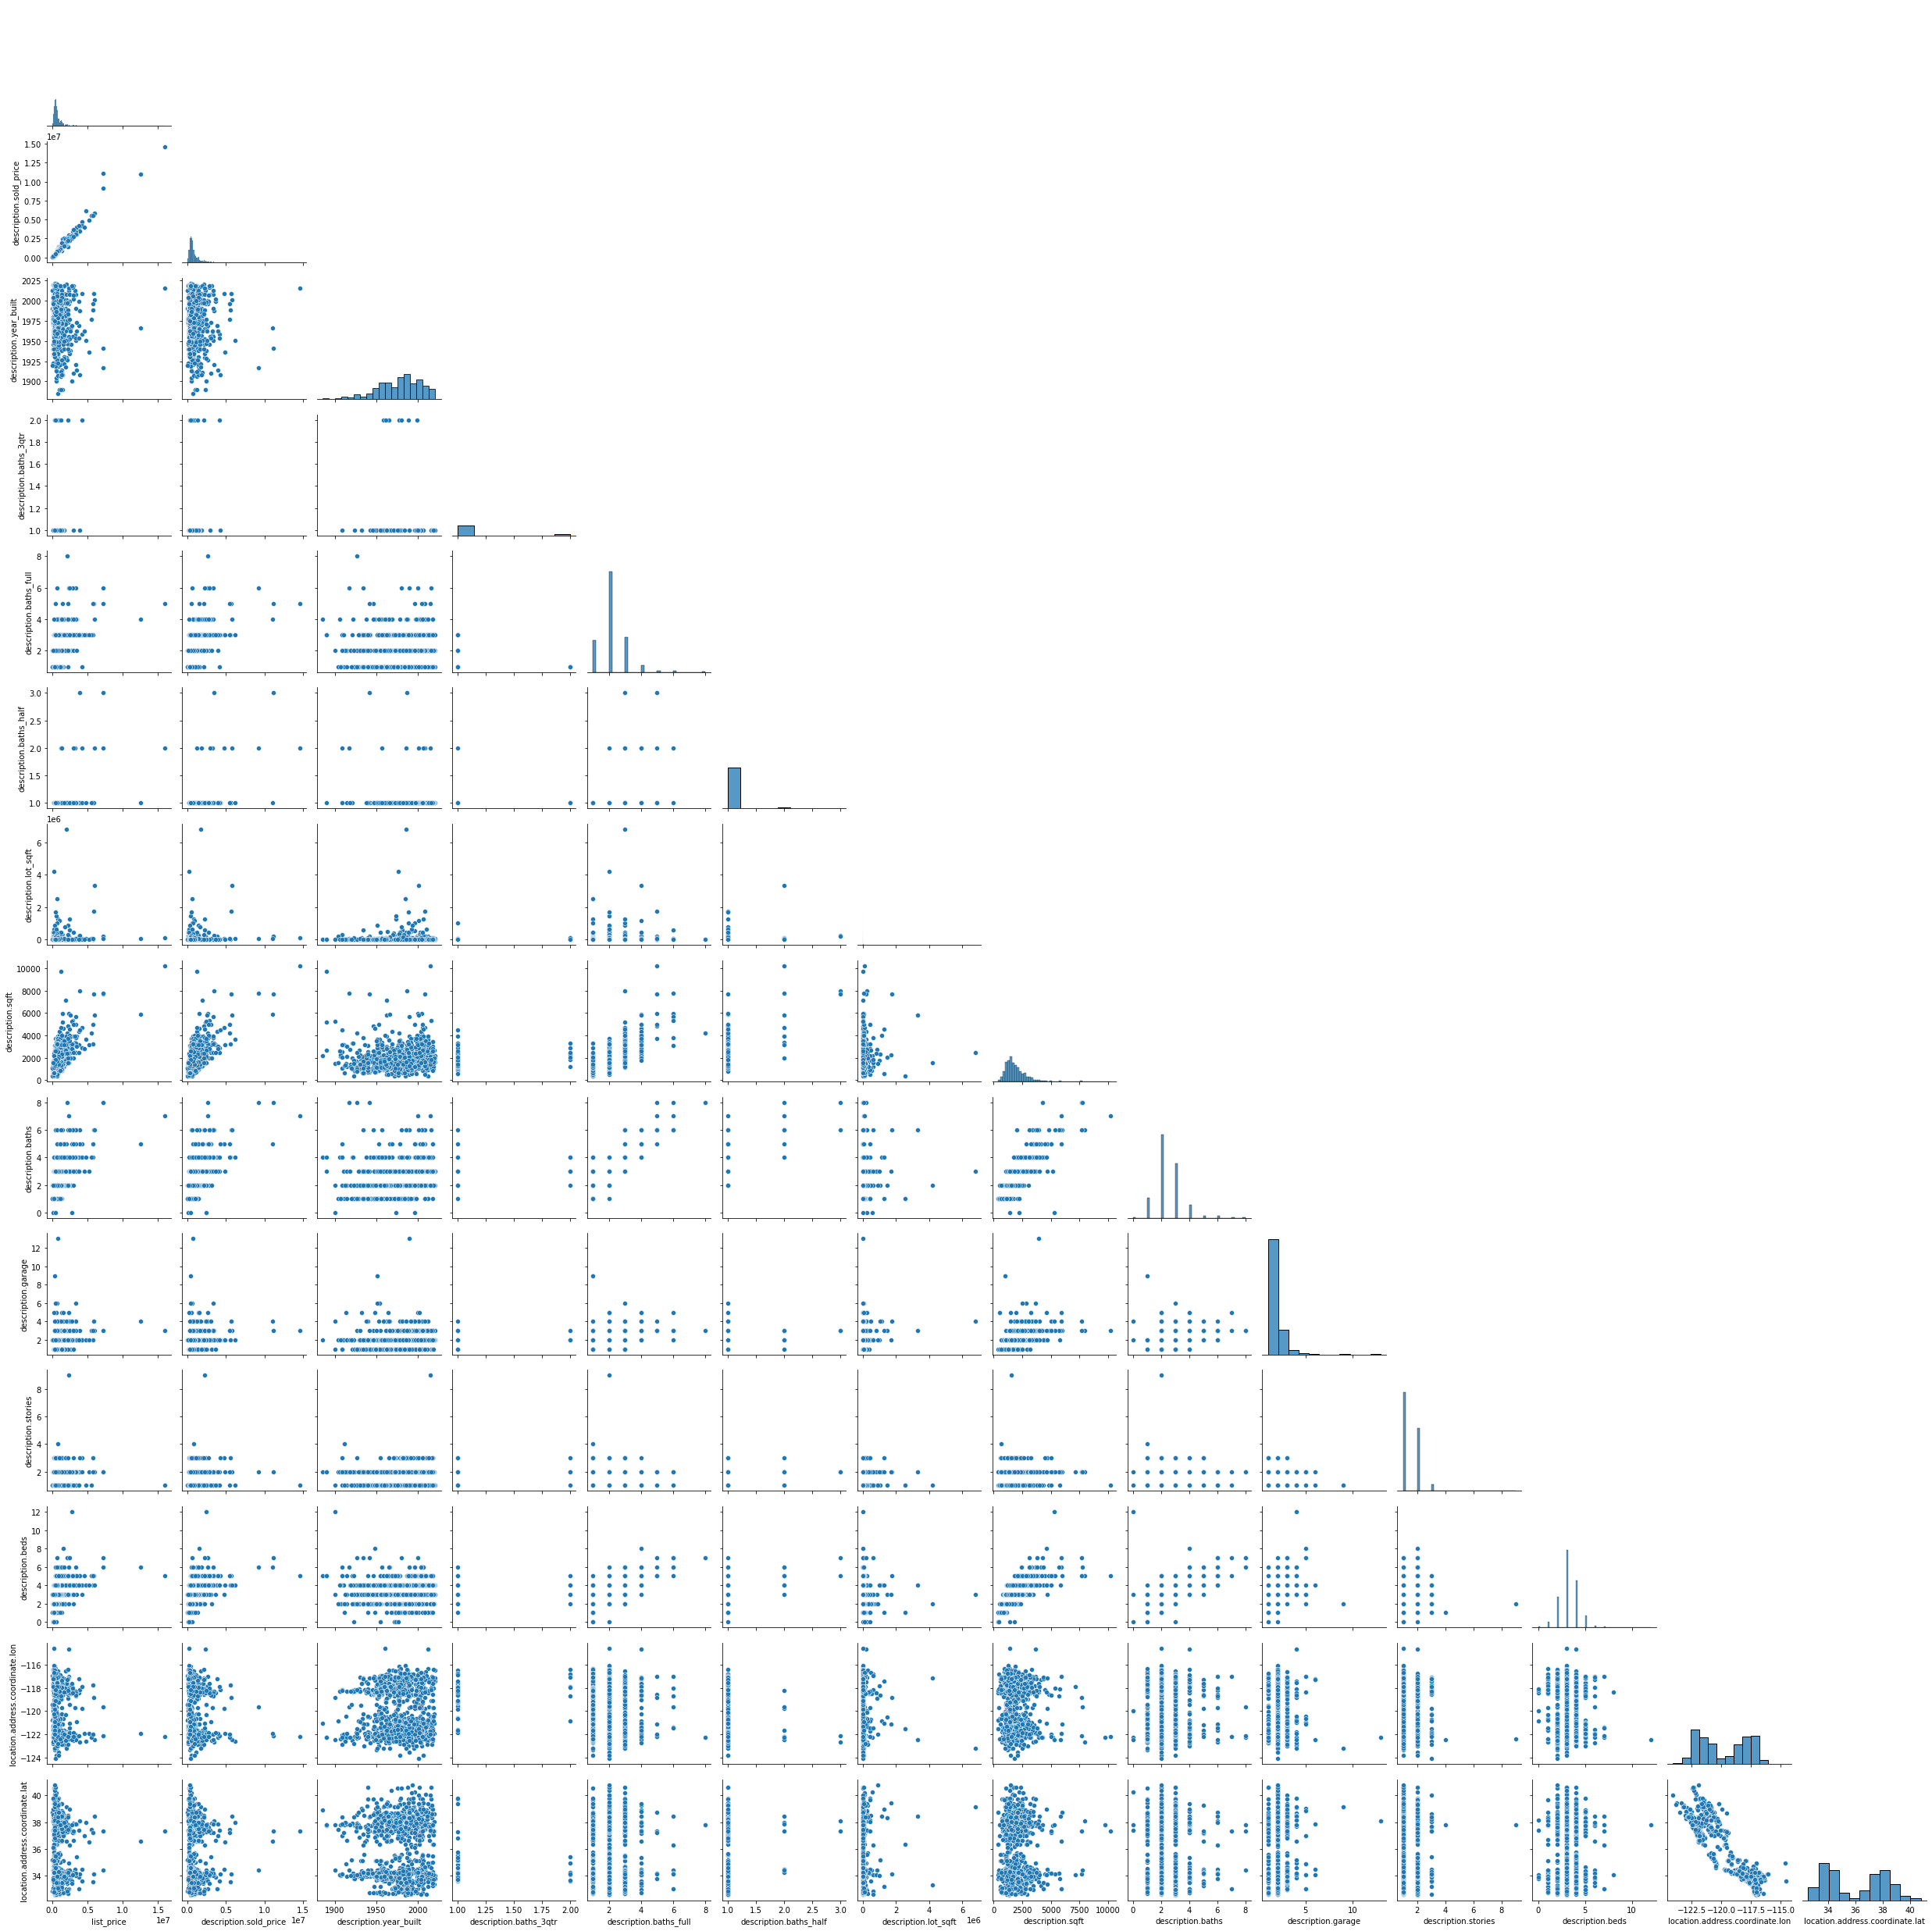

In [13]:
sns.pairplot(sample_df, corner=True)

In [322]:
df.columns

Index(['property_id', 'listing_id', 'status', 'list_date', 'list_price',
       'description.sold_price', 'description.year_built',
       'description.baths_3qtr', 'description.sold_date',
       'description.baths_full', 'description.baths_half',
       'description.lot_sqft', 'description.sqft', 'description.baths',
       'description.type', 'description.garage', 'description.stories',
       'description.beds', 'location.address.postal_code',
       'location.address.state', 'location.address.coordinate.lon',
       'location.address.coordinate.lat', 'location.address.city',
       'location.address.state_code', 'location.address.line',
       'location.county.fips_code', 'location.county.name'],
      dtype='object')

In [346]:
col_to_keep = ['property_id', 'listing_id', 'description.sold_price', 'list_price', 'description.year_built',
               'description.lot_sqft', 'description.sqft', 'description.baths',
               'description.type', 'description.garage', 'description.stories',
            'description.beds']

In [347]:
df2 = df[col_to_keep]

In [348]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72662 entries, 0 to 243197
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   property_id             72662 non-null  object 
 1   listing_id              72662 non-null  object 
 2   description.sold_price  72662 non-null  int64  
 3   list_price              72662 non-null  float64
 4   description.year_built  72662 non-null  int64  
 5   description.lot_sqft    66486 non-null  float64
 6   description.sqft        72662 non-null  float64
 7   description.baths       71477 non-null  float64
 8   description.type        72662 non-null  object 
 9   description.garage      58014 non-null  float64
 10  description.stories     67233 non-null  float64
 11  description.beds        71687 non-null  float64
dtypes: float64(7), int64(2), object(3)
memory usage: 9.2+ MB


In [349]:
#create dummies
type_dummies = pd.get_dummies(df2['description.type'])
df2 = df2.join(type_dummies)
df2.drop(columns = ['description.type', 'farm'], inplace = True)

In [120]:
# zip_dummies = pd.get_dummies(df2['location.address.postal_code'])
# df2 = df2.join(zip_dummies)
# df2.drop(columns = ['location.address.postal_code', '05370'], inplace = True)  #remove an error listing

In [141]:
# city_dummies = pd.get_dummies(df2['location.address.city'])
# df2 = df2.join(city_dummies)
# df2.drop(columns = ['location.address.city', 'Acampo'], inplace = True)

In [350]:
df2['price_pct_change'] = 100*(df2['description.sold_price']- df2['list_price'])/df2['list_price']

In [351]:
df2.head()

,property_id,listing_id,description.sold_price,list_price,description.year_built,description.lot_sqft,description.sqft,description.baths,description.garage,description.stories,description.beds,condo_townhome_rowhome_coop,condos,coop,duplex_triplex,mobile,multi_family,single_family,townhomes,price_pct_change
0,2507173757,2930532060,1760000,1549000.0,1926,2949.0,1648.0,3.0,NaN,2.0,3.0,0,0,0,0,0,0,1,0,13.621691
1,1681184474,2927976112,850000,879000.0,2008,52747.0,1390.0,2.0,NaN,24.0,1.0,0,1,0,0,0,0,0,0,-3.299204
2,2913082626,2930168949,1016000,849000.0,1912,5105.0,1564.0,2.0,NaN,1.0,2.0,0,0,0,0,0,0,1,0,19.670200
3,1415870805,2931114156,1625000,1499000.0,1900,8795.0,2321.0,3.0,NaN,2.0,5.0,0,0,0,0,0,1,0,0,8.405604
4,2820635269,2929515091,385000,395000.0,1985,26454.0,921.0,1.0,2.0,2.0,2.0,0,1,0,0,0,0,0,0,-2.531646


In [352]:
df2 = df2[df2['price_pct_change'] < 101]  #remove an outlier

In [353]:
df2['price_pct_change'].describe()

count    72641.000000
mean         3.551793
std          8.201679
min        -99.908000
25%          0.000000
50%          1.923077
75%          6.909091
max         89.409905
Name: price_pct_change, dtype: float64

In [354]:
df2 = df2.fillna(0)

In [355]:
X = df2.iloc[:, 3:len(df2.columns)-1]

y = df2.iloc[:,-1]

In [356]:
X.columns.tolist()

['list_price',
 'description.year_built',
 'description.lot_sqft',
 'description.sqft',
 'description.baths',
 'description.garage',
 'description.stories',
 'description.beds',
 'condo_townhome_rowhome_coop',
 'condos',
 'coop',
 'duplex_triplex',
 'mobile',
 'multi_family',
 'single_family',
 'townhomes']

In [357]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.2, random_state = 40)

In [358]:
xgb_model1 = XGBRegressor()
xgb_model1.fit(X_train, y_train, verbose=False)
y_train_pred1 = xgb_model1.predict(X_train)
y_pred1 = xgb_model1.predict(X_test)

In [359]:
print('Train r2 score: ', r2_score(y_train_pred1, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred1))
train_mse1 = mean_squared_error(y_train_pred1, y_train)
test_mse1 = mean_squared_error(y_pred1, y_test)
train_rmse1 = np.sqrt(train_mse1)
test_rmse1 = np.sqrt(test_mse1)
print('Train RMSE: %.4f' % train_rmse1)
print('Test RMSE: %.4f' % test_rmse1)

Train r2 score:  -1.484365243515453
Test r2 score:  0.1630657843232436
Train RMSE: 6.4067
Test RMSE: 7.5134


In [360]:
val_pred = xgb_model1.predict(X_val)
val_mse1 = mean_squared_error(val_pred, y_val)
val_rmse1 = np.sqrt(val_mse1)

In [361]:
print('Validation r2 score: ', r2_score(val_pred, y_val))
print('Validation RMSE: %.4f' % val_rmse1)

Validation r2 score:  -2.928707863081717
Validation RMSE: 7.6164


In [271]:
def diagnostic_plot(y, pred):
    plt.figure(figsize=(20,5))

    plt.subplot(1, 3, 1)
    plt.scatter(y, pred)
#     plt.plot(y, pred, color='blue',linewidth=1)
    plt.title("Regression fit")
    plt.xlabel("y_val")
    plt.ylabel("y_pred")
    
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 3, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")
    
    plt.savefig('diagnostic_plot.svg')
    plt.savefig('diagnostic_plot.jpg')

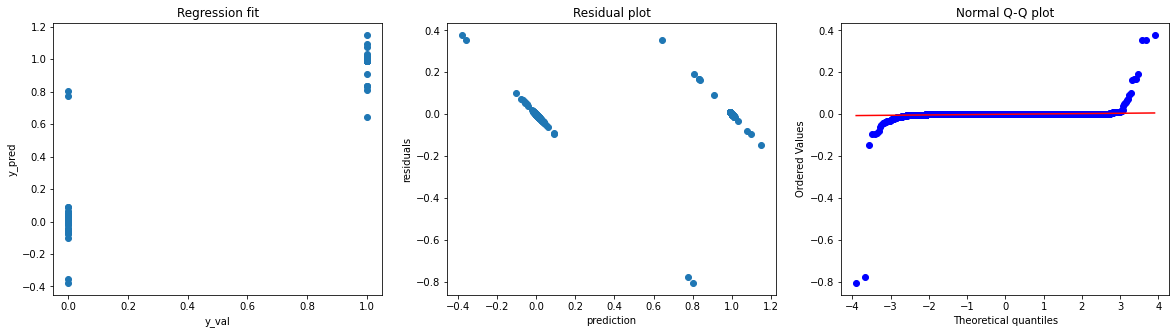

In [231]:
diagnostic_plot(y_test, y_pred1)

In [278]:
#import active listing and run the prediction
with open('./data/df_final.pickle', 'rb') as read_file:
    df_final = pickle.load(read_file)

In [279]:
df_final.head()

,listing_id,property_id,status,list_date,list_price,year_built,baths,garage,stories,beds,...,list_price_y,price_sold,year_built_sold,sold_date,lot_sqft_sold,sqft_sold,bath_sold,beds_sold,location.address.city_y,address_sold
907116,2931339032,2158559976,for_sale,2021-07-06,434950.0,1975.0,1.0,1.0,1.0,1.0,...,394000.0,399000.0,1975.0,2021-07-09,428195.0,653.0,1.0,1.0,San Diego,1775 Diamond St Unit 121
370636,2931803397,2652943692,for_sale,2021-07-15,499900.0,1988.0,2.0,NaN,1.0,2.0,...,460000.0,505000.0,1989.0,2021-06-26,NaN,1252.0,2.0,2.0,Yorba Linda,5215 Box Canyon Ct Unit 20H
2348749,2929560849,2211677120,for_sale,2021-05-21,1388000.0,2003.0,3.0,2.0,2.0,4.0,...,1468000.0,1468000.0,2002.0,2021-07-06,NaN,2387.0,3.0,4.0,Irvine,207 Tuberose
370635,2931803397,2652943692,for_sale,2021-07-15,499900.0,1988.0,2.0,NaN,1.0,2.0,...,525000.0,529000.0,1988.0,2021-07-01,NaN,1252.0,2.0,2.0,Yorba Linda,5265 Box Canyon Ct Unit 24A
370632,2931803397,2652943692,for_sale,2021-07-15,499900.0,1988.0,2.0,NaN,1.0,2.0,...,490000.0,480000.0,1989.0,2021-07-02,NaN,1252.0,2.0,2.0,Yorba Linda,5205 Box Canyon Ct Unit 19D


In [280]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46489 entries, 126157 to 28692
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   description.year_built       46489 non-null  int64  
 1   description.lot_sqft         46489 non-null  float64
 2   description.sqft             46489 non-null  float64
 3   description.baths            46489 non-null  float64
 4   description.garage           46489 non-null  float64
 5   description.stories          46489 non-null  float64
 6   description.beds             46489 non-null  float64
 7   condo_townhome_rowhome_coop  46489 non-null  uint8  
 8   condos                       46489 non-null  uint8  
 9   coop                         46489 non-null  uint8  
 10  duplex_triplex               46489 non-null  uint8  
 11  mobile                       46489 non-null  uint8  
 12  multi_family                 46489 non-null  uint8  
 13  single_fami

In [243]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542081 entries, 907116 to 3393027
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   listing_id               542081 non-null  object 
 1   property_id              542081 non-null  object 
 2   status                   542081 non-null  object 
 3   list_date                542081 non-null  object 
 4   list_price               542081 non-null  float64
 5   year_built               542081 non-null  float64
 6   baths                    540486 non-null  float64
 7   garage                   428237 non-null  float64
 8   stories                  508201 non-null  float64
 9   beds                     541250 non-null  float64
 10  type                     542081 non-null  object 
 11  postal_code              542081 non-null  object 
 12  address                  540501 non-null  object 
 13  city                     542081 non-null  object 
 14

In [281]:
features = ['year_built','lot_sqft', 'sqft', 'baths','type', 'garage', 'stories','beds']

active_listings = df_final[features]

In [282]:
#create dummies
type_dummies = pd.get_dummies(active_listings['type'])
active_listings = active_listings.join(type_dummies)
active_listings.drop(columns = ['type', 'farm'], inplace = True)

In [283]:
active_listings = active_listings.fillna(0)

In [285]:
active_listings.head()

,year_built,lot_sqft,sqft,baths,garage,stories,beds,apartment,condo_townhome_rowhome_coop,condos,coop,duplex_triplex,mobile,multi_family,single_family,townhomes
907116,1975.0,428195.0,653.0,1.0,1.0,1.0,1.0,0,0,1,0,0,0,0,0,0
370636,1988.0,0.0,1252.0,2.0,0.0,1.0,2.0,0,0,1,0,0,0,0,0,0
2348749,2003.0,0.0,2387.0,3.0,2.0,2.0,4.0,0,0,0,0,0,0,0,0,1
370635,1988.0,0.0,1252.0,2.0,0.0,1.0,2.0,0,0,1,0,0,0,0,0,0
370632,1988.0,0.0,1252.0,2.0,0.0,1.0,2.0,0,0,1,0,0,0,0,0,0


In [ ]:
active_listings.rename({""})

In [307]:
X = active_listings.iloc[:, 0:len(active_listings.columns)]


In [304]:
X_train.columns

Index(['description.year_built', 'description.lot_sqft', 'description.sqft',
       'description.baths', 'description.garage', 'description.stories',
       'description.beds', 'condo_townhome_rowhome_coop', 'condos', 'coop',
       'duplex_triplex', 'mobile', 'multi_family', 'single_family',
       'townhomes'],
      dtype='object')

In [309]:
X.rename(columns = {"year_built" : "description.year_built",
          "lot_sqft" : "description.lot_sqft",
          "sqft":"description.sqft",
          "baths":"description.baths",
          "garage":"description.garage",
          "stories":"description.stories",
          "beds":"description.beds"}, inplace = True)

In [310]:
X.columns

Index(['description.year_built', 'description.lot_sqft', 'description.sqft',
       'description.baths', 'description.garage', 'description.stories',
       'description.beds', 'apartment', 'condo_townhome_rowhome_coop',
       'condos', 'coop', 'duplex_triplex', 'mobile', 'multi_family',
       'single_family', 'townhomes'],
      dtype='object')

In [311]:
X.drop(columns = ['apartment'], inplace = True)

In [312]:
X.columns

Index(['description.year_built', 'description.lot_sqft', 'description.sqft',
       'description.baths', 'description.garage', 'description.stories',
       'description.beds', 'condo_townhome_rowhome_coop', 'condos', 'coop',
       'duplex_triplex', 'mobile', 'multi_family', 'single_family',
       'townhomes'],
      dtype='object')

In [313]:
y_pred1 = xgb_model1.predict(X)

In [314]:
y_pred1

array([ 2.092918,  2.247796,  4.992355, ...,  5.314355,  2.945882,
       -3.562208], dtype=float32)

In [316]:
#append to df_final
df_final['pred_price'] = y_pred1

In [317]:
df_final.head()

,listing_id,property_id,status,list_date,list_price,year_built,baths,garage,stories,beds,...,price_sold,year_built_sold,sold_date,lot_sqft_sold,sqft_sold,bath_sold,beds_sold,location.address.city_y,address_sold,pred_price
907116,2931339032,2158559976,for_sale,2021-07-06,434950.0,1975.0,1.0,1.0,1.0,1.0,...,399000.0,1975.0,2021-07-09,428195.0,653.0,1.0,1.0,San Diego,1775 Diamond St Unit 121,2.092918
370636,2931803397,2652943692,for_sale,2021-07-15,499900.0,1988.0,2.0,NaN,1.0,2.0,...,505000.0,1989.0,2021-06-26,NaN,1252.0,2.0,2.0,Yorba Linda,5215 Box Canyon Ct Unit 20H,2.247796
2348749,2929560849,2211677120,for_sale,2021-05-21,1388000.0,2003.0,3.0,2.0,2.0,4.0,...,1468000.0,2002.0,2021-07-06,NaN,2387.0,3.0,4.0,Irvine,207 Tuberose,4.992355
370635,2931803397,2652943692,for_sale,2021-07-15,499900.0,1988.0,2.0,NaN,1.0,2.0,...,529000.0,1988.0,2021-07-01,NaN,1252.0,2.0,2.0,Yorba Linda,5265 Box Canyon Ct Unit 24A,2.247796
370632,2931803397,2652943692,for_sale,2021-07-15,499900.0,1988.0,2.0,NaN,1.0,2.0,...,480000.0,1989.0,2021-07-02,NaN,1252.0,2.0,2.0,Yorba Linda,5205 Box Canyon Ct Unit 19D,2.247796


In [319]:
#save into pickle
with open('./data/df_final_all.pickle', 'wb') as to_write:
    pickle.dump(df_final, to_write)